In [83]:
# coding: utf-8

# In[113]:


import datetime as dt
import pandas as pd
import pickle
import os
import datetime


# In[128]:


def getStoredData(srtdt, enddt, ticker):
    #currently assumes that csv data is organised in format: Date,Open,High,Low,Close,Adj Close,Volume
    #also assumes that the name of the csv is the same as that as the ticker
    path = r'C:\Users\Koh Zheng Yang\Downloads\Man AHL Hackathon\Stock_Recommender_Data'
    beginning_of_time='01/01/2000'
    os.chdir(path)
    try:
        print("try")
        #attempt to load the csv file from the path directory
        frame = pd.read_csv(ticker+'.csv')
    except FileNotFoundError:
        #if the file doesn't exist then send a request to get the data for the ticker's dates
        frame = getdata(beginning_of_time, datetime.date.today().strftime('%d/%m/%Y'), ticker)
        frame.to_csv(ticker+'.csv')
    return frame.loc[srtdt:enddt]
    


# In[129]:


def getdata(startime, endtime, ticker):
    d=[123, 456, 789]
    df = pd.DataFrame(data=d)
    return df


# In[132]:


data = getStoredData('15-11-2011', '31-1-2012', '^GSPC')
data.head()

try


,Date,Open,High,Low,Close,Adj Close,Volume
1500,2005-12-20,1259.920044,1263.859985,1257.209961,1259.619995,1259.619995,1996690000
1501,2005-12-21,1259.619995,1269.369995,1259.619995,1262.790039,1262.790039,2065170000
1502,2005-12-22,1262.790039,1268.189941,1262.500000,1268.119995,1268.119995,1888500000
1503,2005-12-23,1268.119995,1269.760010,1265.920044,1268.660034,1268.660034,1285810000
1504,2005-12-27,1268.660034,1271.829956,1256.540039,1256.540039,1256.540039,1540470000


In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
    
def currency2Float(x):
    '''
    Converts currency into string type
    '''
    result = x.replace('$','').replace(',','')
    return result

def convertCurrencyColsToFloats(data, cols):
    '''
    Converts Currency feature columns into floats
    '''    
    try:
        for col in cols:
            print(col)
            data[col] = data[col].apply(lambda x: currency2Float(x)).astype('float')
            
    except Exception as e:
        print("Error occured: Missing columns in DataFrame!!".format(e))
    return data

def signExtra(x):
    y = np.sign(x)
    if y == -1:
        return 0
    else:
        return y
vecSign = np.vectorize(signExtra)
    
def data_cleaning(data):
    """
    Gets the Dow Jones Index data. 
    Removes unwanted feature columns.
    Computes the output/response of the model as the direction of the future returns.    
    """
    raw_data = data
    
    #Drop unwanted columns
    for col in raw_data.columns:
        if col not in ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']:
            raw_data.drop(col, axis=1, inplace=True)
        else:
            pass
    
    #Add direction
    raw_data['direction'] = vecSign(raw_data.Close.pct_change())
    
    #Add return
    data['return'] = data.Close.pct_change()
    
    return raw_data.dropna()

data1 = data_cleaning(data)
data1.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sign


,Date,Open,High,Low,Close,Volume,direction,return
1501,2005-12-21,1259.619995,1269.369995,1259.619995,1262.790039,2065170000,1.0,0.002517
1502,2005-12-22,1262.790039,1268.189941,1262.500000,1268.119995,1888500000,1.0,0.004221
1503,2005-12-23,1268.119995,1269.760010,1265.920044,1268.660034,1285810000,1.0,0.000426
1504,2005-12-27,1268.660034,1271.829956,1256.540039,1256.540039,1540470000,0.0,-0.009553
1505,2005-12-28,1256.540039,1261.099976,1256.540039,1258.170044,1422360000,1.0,0.001297


In [109]:
def reOrderColumns(data, col_name='direction'):
    cols = list(data.columns.values) #Make a list of all of the columns in the df
    cols.pop(cols.index(col_name)) #Remove b from list
    data = data[cols+[col_name]] #Create new dataframe with column
    return data

def engineerFeatureData(data, lag=4, is_lag_return=True, is_lag_vol=False):
    vol_lead = 1
    
    data_change = data.copy()
     
    # Engineer the return feature
    data_change['return_t0'] = data["return"].copy()
    if is_lag_return:
        for i in range(0, lag):
            data_change["return_t{}".format(str(i+1))] = data_change["return_t0"].shift(i+1)

    # Engineer the volume feature
    data_change["vol_t0"] = data["Volume"]
    if is_lag_vol:
        for i in range(0, lag):
            data_change["vol_t{}".format(str(i+1))] = data_change["vol_t0"].shift(i+1)

    # Further clean-up drop old columns
    drop_cols = ['return', 'Volume']
    data_change.drop(drop_cols, axis=1, inplace=True)
    new_data = reOrderColumns(data_change)
    return new_data.dropna()

data2 = engineerFeatureData(data1)
data2.head()

,Date,Open,High,Low,Close,return_t0,return_t1,return_t2,return_t3,return_t4,vol_t0,direction
1505,2005-12-28,1256.540039,1261.099976,1256.540039,1258.170044,0.001297,-0.009553,0.000426,0.004221,0.002517,1422360000,1.0
1506,2005-12-29,1258.170044,1260.609985,1254.180054,1254.420044,-0.002981,0.001297,-0.009553,0.000426,0.004221,1382540000,0.0
1507,2005-12-30,1254.420044,1254.420044,1246.589966,1248.290039,-0.004887,-0.002981,0.001297,-0.009553,0.000426,1443500000,0.0
1508,2006-01-03,1248.290039,1270.219971,1245.739990,1268.800049,0.016430,-0.004887,-0.002981,0.001297,-0.009553,2554570000,1.0
1509,2006-01-04,1268.800049,1275.369995,1267.739990,1273.459961,0.003673,0.016430,-0.004887,-0.002981,0.001297,2515330000,1.0


In [110]:
#Analyse response data (y) Class balance - Is it imbalance?

def reportClassImbalance(data):
    '''
    Reports the response data class imbalance 
    '''
    result = np.array(data['direction'].value_counts())
    print("Class balance is: ")
    for i, v in enumerate(result.tolist()):
        print("   Class {0} is {1}".format(i,v))
        

reportClassImbalance(data2)

Class balance is: 
   Class 0 is 875
   Class 1 is 720


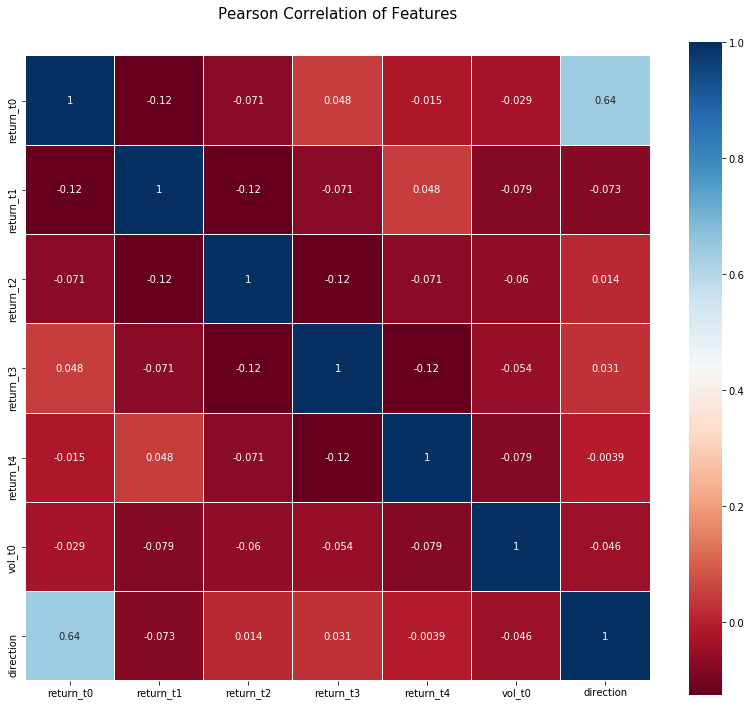

In [106]:
#Analyse Feature correlation
#Construct a Pearson Correlation Heatmap for the feature space

def plotPearsonHeatMap(data):
    colormap = plt.cm.RdBu
    plt.figure(figsize=(14,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

data21 = data2
droplist=['Date', 'Open', 'High', 'Low', 'Close']
data21.drop(droplist, axis=1, inplace=True)

plotPearsonHeatMap(data21)

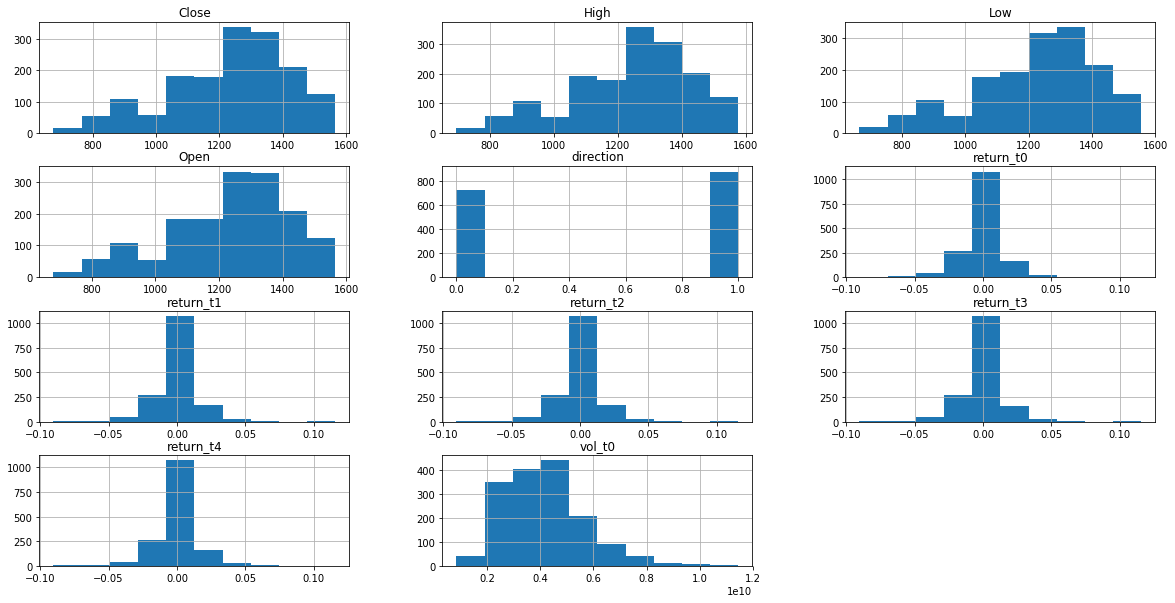

In [111]:
#Plot Distributions of the features
#We will generate some plots to observe the distribution of data for each feature.
#Also will generate a feature-feature plot called a scatter-matrix in Pandas

#pd.options.display.mpl_style = 'default'
plt.rcParams["figure.figsize"] = (20,10)
def generateDistributionPlots(data):
    '''
    Plots the histogram of each feature
    '''
    data.hist()
    
generateDistributionPlots(data2)

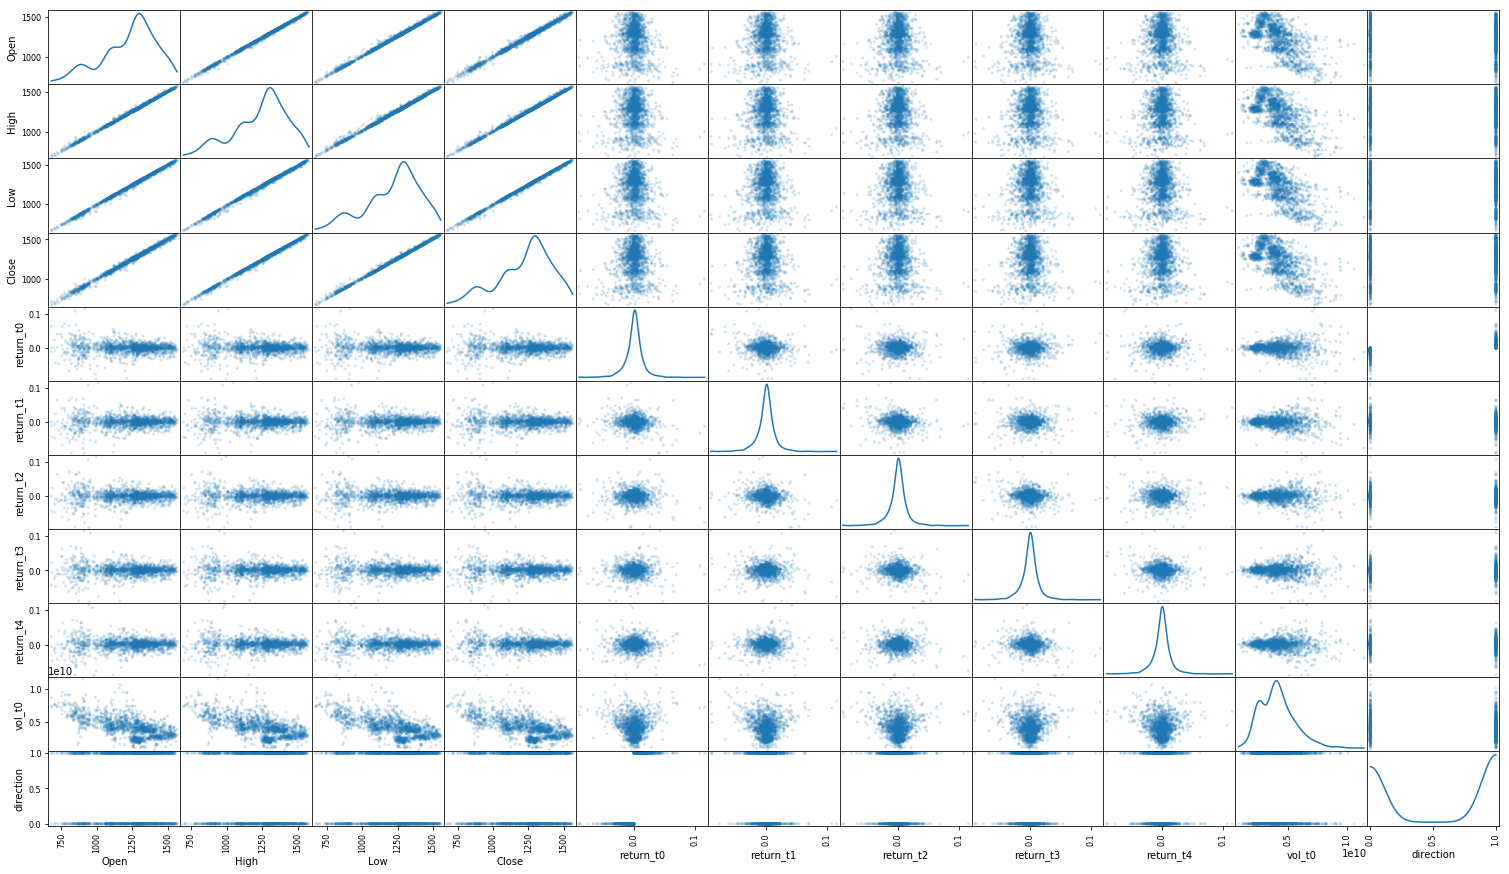

In [112]:
def generateScatterMatixPlot(data):
    '''
    Plots the Scatter-Matrix showing the feature-feature relationships
    '''
    from pandas.plotting import scatter_matrix
    scatter_matrix(data, alpha=0.2, figsize=(26, 15), diagonal='kde')
    
generateScatterMatixPlot(data2)